## Load Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
baseurl = '/content/drive/MyDrive/Datalist'

Mounted at /content/drive


## Load pickled YouTube data (need youtube.ytf module)

In [ ]:
import pickle
import os

os.chdir('/content/drive/MyDrive/')
## youtube module load from drive folder
import youtube.ytf

ytrawbig = []
for filename in os.listdir(baseurl):
  f = os.path.join(baseurl, filename)
  if os.path.isfile(f):
    print('Unpacking file : '+baseurl + '/' + filename)
    ytfile = open(f, "rb")
    ytraw = pickle.load(ytfile)
    ytrawbig.append(ytraw)
    ytfile.close()


Unpacking file : /content/drive/MyDrive/Datalist/datalist10_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist11_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist12_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist13_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist14_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist1_0_10_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist2_11_20_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist3_21_26_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist4_27_35_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist5_36_43_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist6_44_77_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist7_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist8_rgb.pkl
Unpacking file : /content/drive/MyDrive/Datalist/datalist9_rgb.pkl


## Data Exploring

[159, 0, 2, 0, 0, 0, 1, 1, 0]
[2103, 2, 5, 5, 0, 1, 0, 0, 0]
[806, 2, 13, 0, 0, 1, 0, 0, 0]
[199, 1, 2, 0, 0, 0, 0, 0, 0]
[59, 0, 0, 0, 0, 0, 0, 0, 0]
[91, 2, 3, 0, 0, 0, 0, 0, 0]
[72, 0, 1, 0, 0, 0, 0, 0, 0]
[1418, 3, 17, 0, 0, 1, 0, 4, 0]
[3113, 4, 6, 0, 0, 0, 0, 0, 0]
[238, 0, 1, 1, 0, 0, 0, 0, 0]
Mean of Viewcounts = 22333.154399549385 Standard deviation of Viewcounts = 89700.51839862039


Text(0.5, 1.0, 'Histogram of Viewcounts, mean = 22333.154399549385 stdev = 89700.51839862039')

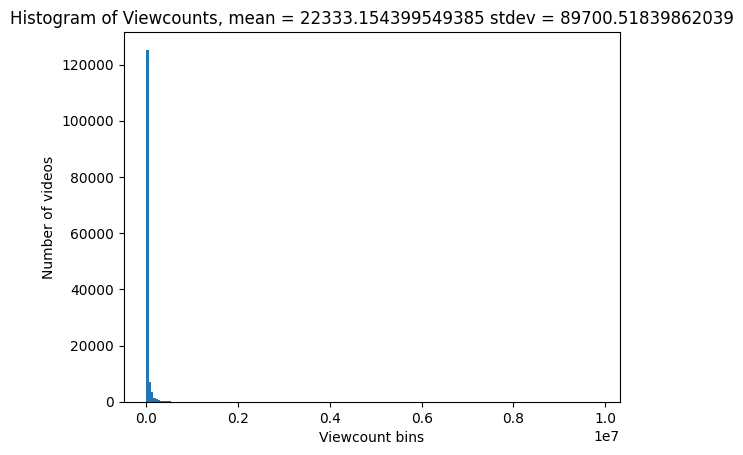

In [ ]:
# print out videoLabels attribute for first 10 videos in ytrawbig[0]

# videoLabels attribute contains: totalviews,totalcomments,totallikes,totaldislikes,totalshares,totalsubsgained,totalsubslost,totalfavadd,totalfavlost
for i in range(10):
  print(ytrawbig[0][i].videoLabels)

viewcounts = []
for ytrawlist in ytrawbig:
  for vid in ytrawlist:
    viewcounts.append(vid.videoLabels[0])

import math

viewcount_mean = sum(viewcounts)/len(viewcounts)
viewcount_stdev = math.sqrt(sum([ (viewcount-viewcount_mean)**2 for viewcount in viewcounts])/len(viewcounts))
print('Mean of Viewcounts = '+str(viewcount_mean)+' Standard deviation of Viewcounts = '+str(viewcount_stdev))

import matplotlib.pyplot as plt

plt.hist(viewcounts,bins = 200)
plt.xlabel('Viewcount bins')
plt.ylabel('Number of videos')
plt.title('Histogram of Viewcounts, mean = '+str(viewcount_mean)+' stdev = '+str(viewcount_stdev))


## Identify unique video categories, segregate data based on video category

In [ ]:
vids_seg_category = {}

for ytrawlist in ytrawbig:
  for vid in ytrawlist:
    # Contents of videoNumFeatures attribute:
    # duration,category,chantotalviews,chantotalcomments,chantotallikes,chantotaldislikes,chantotalshares,chantotalsubsgained,chantotalsubslost,chantotalsubscribers
    category = vid.videoNumFeatures[1]
    if category in vids_seg_category.keys():
      vids_seg_category[category].append(vid)
    else:
      vids_seg_category[category] = []

# print unique categories and number of videos in the first category
categories_list = list(vids_seg_category.keys())
print('Set of unique categories in the YouTube dataset = '+str(categories_list))
categories_list.sort()
print('Number of vides in first category = '+str(len(vids_seg_category[categories_list[0]])))

Set of unique categories in the YouTube dataset = [20, 1, 10, 43, 24, 27, 23, 22, 28, 19, 25, 44, 26, 29, 30, 17, 15, 2]
Number of vides in first category = 2873


## Feature Engineering
## Recasting YouTube thumbnail labels and title text to a lower dimension, followed by quantization into non-overlapping regions. Each region corresponds to a unique state in the rationally inattentive utility maximization problem.

### Collect thumbnail and title data

(0.0, 1.0, 0.0, 1.0)

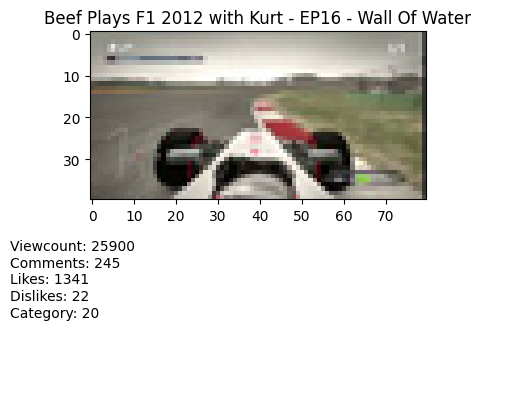

In [ ]:
thumbnail_data = []
title_data = []
vidlabel_data = []
vidfeatures_data = []
for ytrawlist in ytrawbig:
  for vid in ytrawlist:
    thumbnail_data.append(vid.image)
    title_data.append(vid.title)
    vidlabel_data.append(vid.videoLabels)
    vidfeatures_data.append(vid.videoNumFeatures)

# show a video's title description, image thumbnail and metadata (videoLabels), where the video is indexed by vid_index (below)
# videoLabels attribute contains: totalviews,totalcomments,totallikes,totaldislikes,totalshares,totalsubsgained,totalsubslost,totalfavadd,totalfavlost
plt.subplot(2,1,1)
vid_index = 100000
plt.imshow(thumbnail_data[vid_index])
plt.title(title_data[vid_index])
plt.subplot(2,1,2)
plt.text(0,0.9, "Viewcount: {}".format(vidlabel_data[vid_index][0]))
plt.text(0,0.8, "Comments: {}".format(vidlabel_data[vid_index][1]))
plt.text(0,0.7, "Likes: {}".format(vidlabel_data[vid_index][2]))
plt.text(0,0.6, "Dislikes: {}".format(vidlabel_data[vid_index][3]))
plt.text(0,0.5, "Category: {}".format(vidfeatures_data[vid_index][1]))
plt.axis("off")

In [ ]:
import numpy as np
from PIL import Image


bad_indices = []
# flatten images, convert to np array
thumbnails_processed = []; thumbnails_processed_nonflattened = []
for index in range(20000):
  if type(thumbnail_data[index]) == list:
    bad_indices.append(index)
  else:
    size = thumbnail_data[index].shape
    # np.resize(thumbnail_data[index],(int(size[0]/2), int(size[1]/2), size[2])) # shrink dimension by 2 (only height and width)
    thumbnails_processed.append(np.dot(thumbnail_data[index], [0.299, 0.587, 0.114]).flatten()) # flatten image after converting to grayscale
    thumbnails_processed_nonflattened.append(np.dot(thumbnail_data[index], [0.299, 0.587, 0.114]))


import pickle
with open('thumbnails_grayscale_nonflattened.pkl', 'wb') as handle:
    pickle.dump(thumbnails_processed_nonflattened, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# ### FREE UP RAM ### 
# del ytrawlist,ytrawbig,thumbnail_data,title_data,vids_seg_category
# ####################

### Feature Engineering Approach 1: Flatten images and use tsne from sklearn.manifold for a low-dimensional representation

In [ ]:
thumbnails_processed = np.array(thumbnails_processed) # convert into np array for TSNE processing
from sklearn.manifold import TSNE

# TSNE dimension reduction
thumbnails_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=6).fit_transform(thumbnails_processed[0:10000])


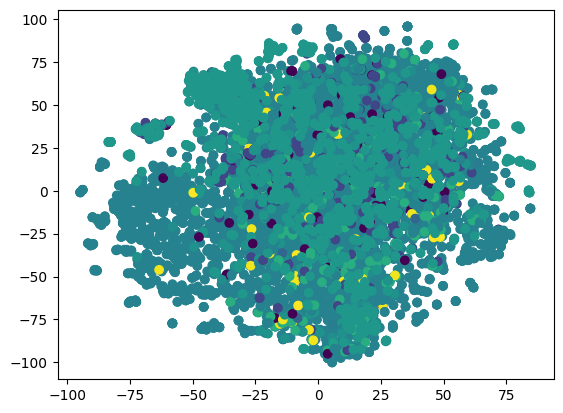

In [ ]:
plt.scatter(thumbnails_embedded[:,0],thumbnails_embedded[:,1],c = [elem[1] for elem in vidfeatures_data[0:10000]])

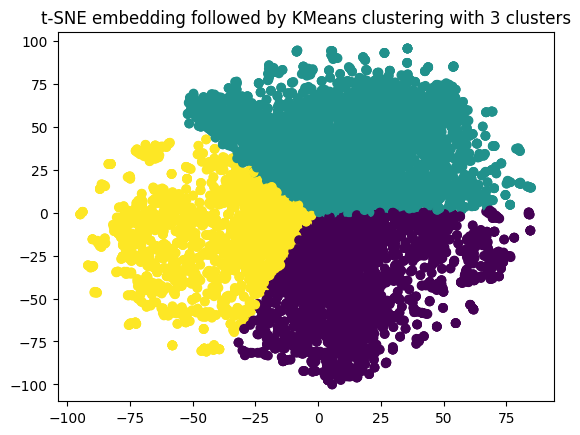

The silhouette score for n_clusters = 3 is : 0.3851911


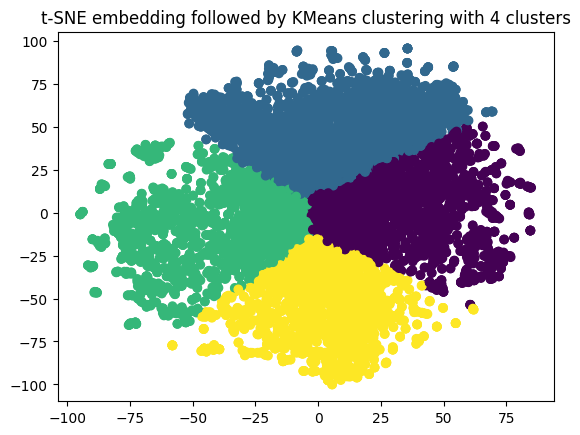

The silhouette score for n_clusters = 4 is : 0.3677812


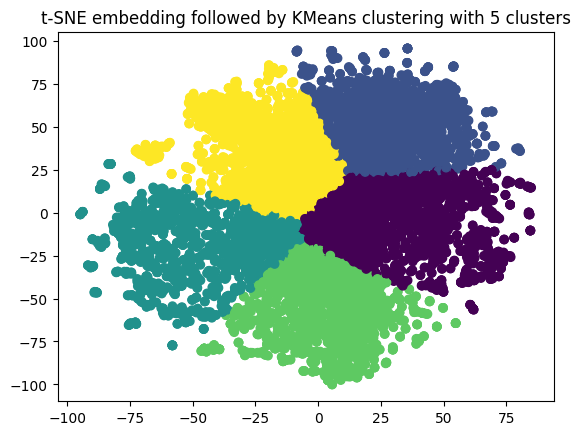

The silhouette score for n_clusters = 5 is : 0.37244043


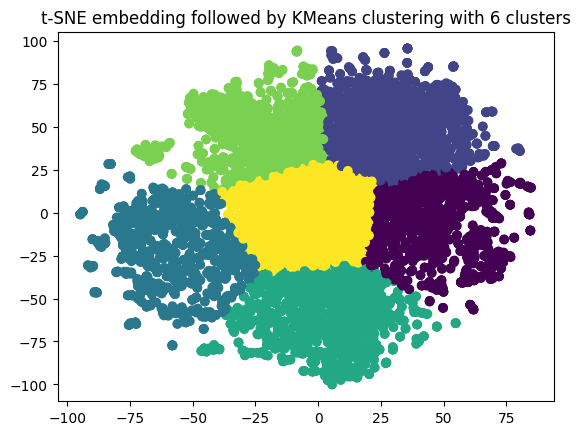

The silhouette score for n_clusters = 6 is : 0.39612752


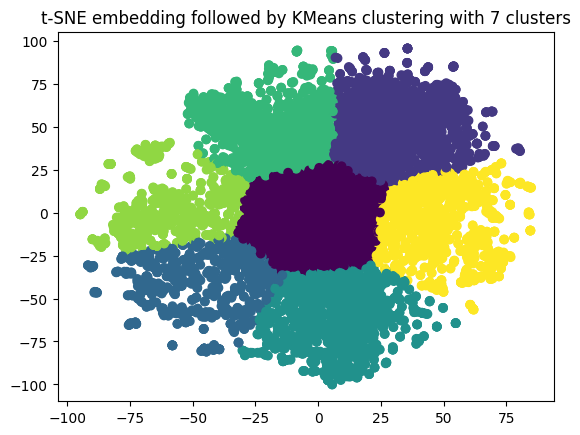

The silhouette score for n_clusters = 7 is : 0.38132775


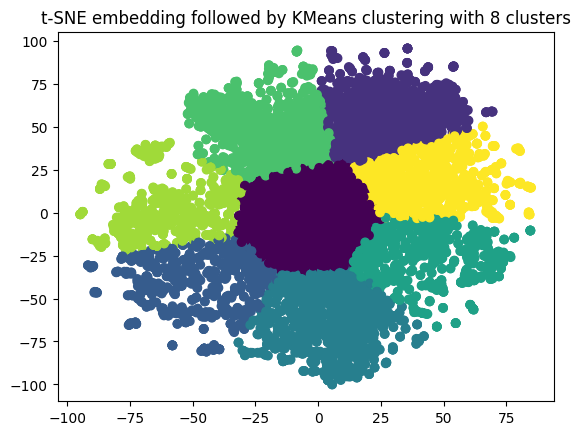

The silhouette score for n_clusters = 8 is : 0.36303487


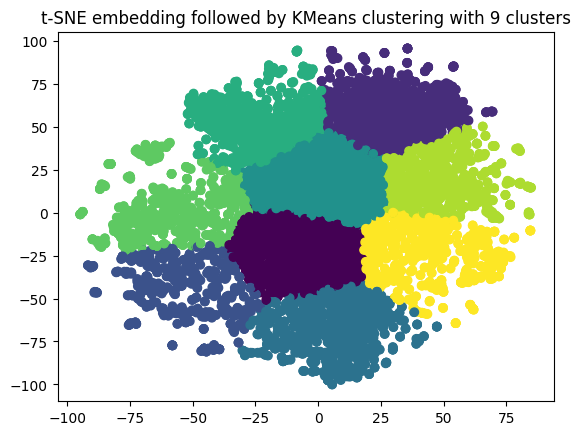

The silhouette score for n_clusters = 9 is : 0.36728403


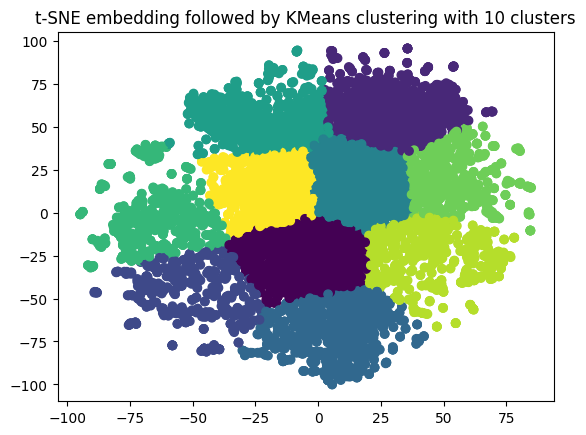

The silhouette score for n_clusters = 10 is : 0.36509433


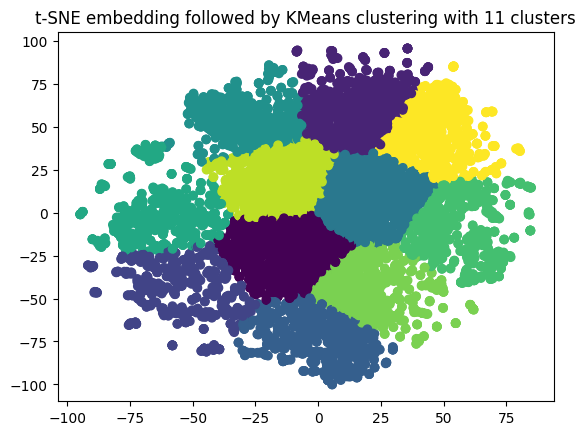

The silhouette score for n_clusters = 11 is : 0.35278174


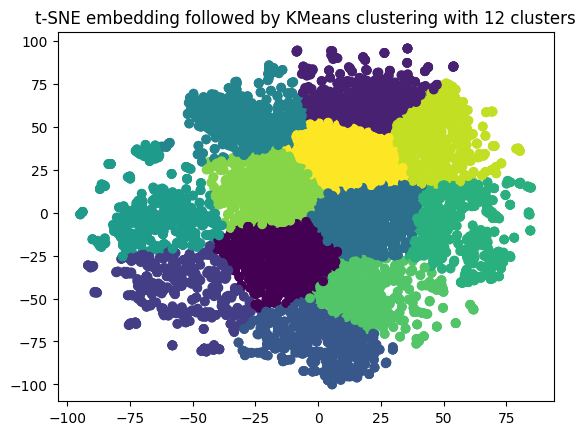

The silhouette score for n_clusters = 12 is : 0.35498917


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silscore_arr = []
start = 3
NUM_ITER = 10
for n_clusters in range(start,start+NUM_ITER):
  kmeans_labels = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit_predict(thumbnails_embedded)
  plt.scatter(thumbnails_embedded[:,0],thumbnails_embedded[:,1],c=kmeans_labels)
  plt.title('t-SNE embedding followed by KMeans clustering with {} clusters'.format(n_clusters))
  plt.show()
  sil_score = silhouette_score(thumbnails_embedded,kmeans_labels) # the larger the better - measures disparity (separatedness)
  print('The silhouette score for n_clusters = {} is : '.format(n_clusters) + str(sil_score))
  silscore_arr.append(sil_score)



In [ ]:
from operator import itemgetter
index, element = max(enumerate(silscore_arr), key=itemgetter(1))
print('Best number of clusters that maximizes silhouette score is '+ str(start + index))

Best number of clusters that maximizes silhouette score is 6


## Pickle Grayscale Thumbnail Data

In [ ]:
import pickle
with open('thumbnails_grayscale.pkl', 'wb') as handle:
    pickle.dump(thumbnails_processed, handle, protocol=pickle.HIGHEST_PROTOCOL)